In [4]:
import os
import re
import glob
import numpy as np
import filament
import GPX_functions
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()                         
from osgeo import gdal, osr
import logging
from importlib import reload
reload(filament)

<module 'filament' from '/home/ctroupin/Projects/Perso/trail-running-maps/python/filament.py'>

In [41]:
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [8]:
datafilelist = ["/data/GPX/Tenerife/0-4-0-playa-el-socorro-teide-playa-el-socorro.gpx"]

In [54]:
visfile1 = "/data/Visible/Sentinel-2-L1C_2019-07-25_1.tiff"
visfile2 = "/data/Visible/Sentinel-2-L1C_2019-07-25_2.tiff"
visfile = "/data/Visible/Sentinel-2-L1C_2019-07-25_3.tiff"
os.path.isfile(visfile1) & os.path.isfile(visfile2)

True

In [55]:
vis = filament.Visible()
vis.read_geotiff(visfile)
vis1 = filament.Visible()
vis1.read_geotiff(visfile1)
vis2 = filament.Visible()
vis2.read_geotiff(visfile2)

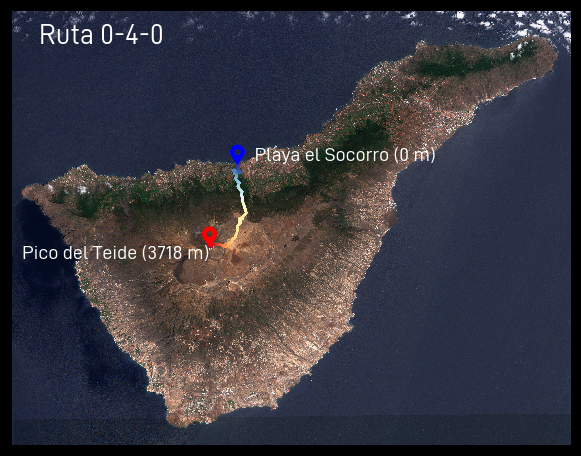

In [66]:
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('black')
ax = plt.subplot(111, projection=myproj)
#vis1.add_to_plot(ax, myproj)
#vis2.add_to_plot(ax, myproj)
vis.add_to_plot(ax, myproj)
ax.set_xlim(-16.94, -16.1)


for df in datafilelist:
    lon, lat, ele, t = GPX_functions.read_gpx(df)
    ax.scatter(lon, lat, s=1, c=ele, zorder=6, alpha=.8, cmap=plt.cm.RdYlBu_r)

t = plt.text(0.05, 0.97, 'Ruta 0-4-0', fontproperties=myfont,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=28)

ax.text(lon[0], lat[0], "\uf3c5", fontproperties=fp1,
        fontsize=20, ha="center", va="bottom", zorder=7, color="blue")

ax.text(lon[0], lat[0], "    Playa el Socorro (0 m)", fontproperties=myfont,
        fontsize=20, ha="left", va="bottom", zorder=7, color="w")
ax.text(-16.642466, 28.272292, "\uf3c5", fontproperties=fp1,
        fontsize=20, ha="center", va="bottom", zorder=7, color="red")
ax.text(-16.642466, 28.272292, "Pico del Teide (3718 m)", fontproperties=myfont,
        fontsize=20, ha="right", va="top", zorder=7, color="w")


plt.savefig("../images/ruta040_c.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()